In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Nova seção

In [7]:
Base_Dados = pd.read_csv('salario_limite_credito.csv')
Base_Dados

,salario,limite_credito
0,8741.72,18454.18
1,19112.86,48943.42
2,15175.89,39405.09
3,12775.85,28367.87
4,4808.34,21349.72
...,...,...
195,8285.77,13677.11
196,15067.20,34075.78
197,18147.98,44302.71
198,17967.56,46473.44


In [8]:
Base_Dados.head()

,salario,limite_credito
0,8741.72,18454.18
1,19112.86,48943.42
2,15175.89,39405.09
3,12775.85,28367.87
4,4808.34,21349.72


In [9]:
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   salario         200 non-null    float64
 1   limite_credito  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [10]:
Base_Dados.describe()

,salario,limite_credito
count,200.000000,200.000000
mean,10712.112150,27118.154600
std,5308.045864,14016.889072
min,2099.400000,0.000000
25%,6114.485000,14433.975000
50%,10900.750000,25975.290000
75%,15623.472500,39876.552500
max,19763.960000,55742.600000


In [11]:
Eixo_x = Base_Dados.iloc[:, 0].values
Eixo_y = Base_Dados.iloc[:, 1].values

In [8]:
Eixo_x

array([ 8741.72, 19112.86, 15175.89, 12775.85,  4808.34,  4807.9 ,
        3045.51, 17591.17, 12820.07, 14745.31,  2370.52, 19458.38,
       16983.97,  5822.1 ,  5272.85,  5301.28,  7476.36, 11445.62,
        9775.01,  7242.12, 13013.35,  4510.89,  7258.6 ,  8594.51,
       10209.26, 16133.17,  5594.13, 11256.22, 12663.46,  2836.11,
       12935.81,  5069.43,  3170.93, 19079.94, 19381.38, 16551.15,
        7483.05,  3758.1 , 14316.19,  9922.74,  4196.69, 10913.18,
        2618.99, 18367.77,  6658.04, 13925.4 ,  7610.8 , 11361.22,
       11840.79,  5327.38, 19452.52, 15952.39, 18910.98, 18106.89,
       12762.2 , 18593.74,  3592.87,  5527.69,  2814.09,  7855.95,
        8996.19,  6884.28, 16917.28,  8421.56,  7056.82, 11768.53,
        4536.64, 16439.55,  3341.91, 19763.96, 15900.41,  5576.88,
        2099.4 , 16678.31, 14723.43, 15122.13, 15882.87,  3332.8 ,
        8452.38,  4085.64, 17535.86, 13219.37,  7956.16,  3144.05,
        7597.68,  7853.3 , 15132.91, 13476.03, 17969.83, 10499

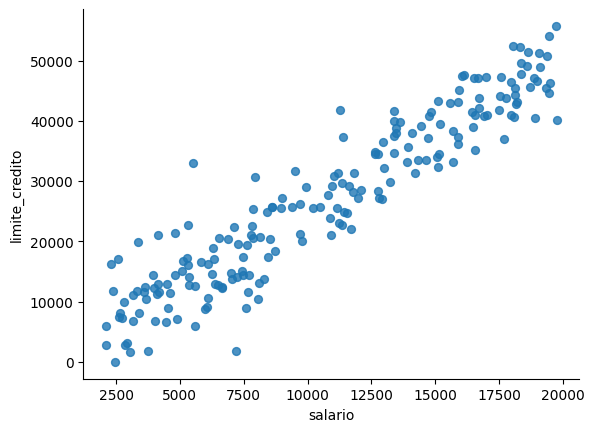

In [12]:
# @title salario vs limite_credito

from matplotlib import pyplot as plt
Base_Dados.plot(kind='scatter', x='salario', y='limite_credito', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

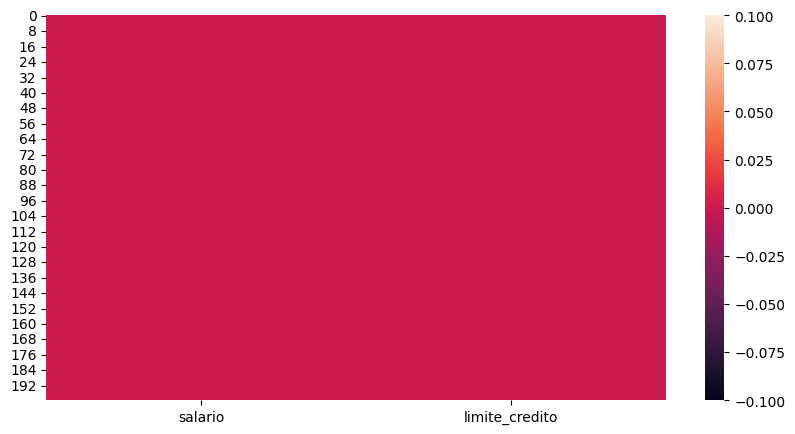

In [13]:
plt.figure(figsize=(10, 5))
sns.heatmap(Base_Dados.isnull());

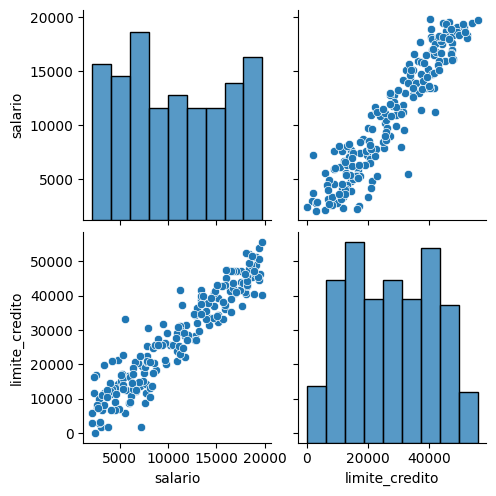

In [14]:
sns.pairplot(Base_Dados);

In [15]:
correlacao = np.corrcoef(Eixo_x, Eixo_y)
correlacao

array([[1.        , 0.93842136],
       [0.93842136, 1.        ]])

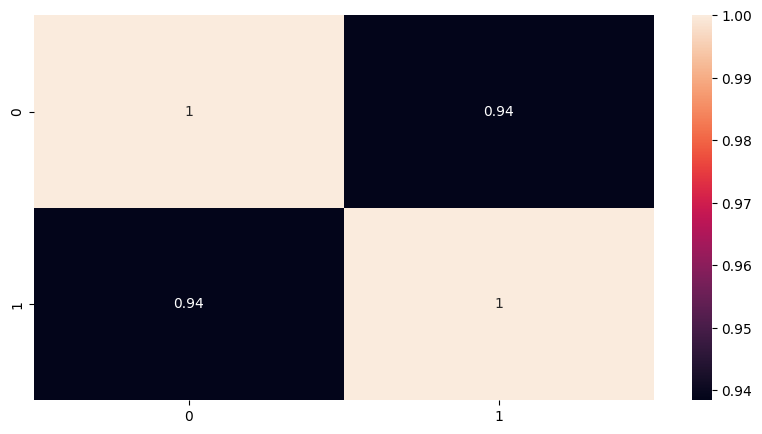

In [16]:
plt.figure(figsize=(10, 5))
sns.heatmap(correlacao, annot=True);

In [17]:
# converter dados para formado de matriz
Eixo_x = Eixo_x.reshape(-1, 1)
Eixo_y = Eixo_y.reshape(-1, 1)

In [18]:
Eixo_x

array([[ 8741.72],
       [19112.86],
       [15175.89],
       [12775.85],
       [ 4808.34],
       [ 4807.9 ],
       [ 3045.51],
       [17591.17],
       [12820.07],
       [14745.31],
       [ 2370.52],
       [19458.38],
       [16983.97],
       [ 5822.1 ],
       [ 5272.85],
       [ 5301.28],
       [ 7476.36],
       [11445.62],
       [ 9775.01],
       [ 7242.12],
       [13013.35],
       [ 4510.89],
       [ 7258.6 ],
       [ 8594.51],
       [10209.26],
       [16133.17],
       [ 5594.13],
       [11256.22],
       [12663.46],
       [ 2836.11],
       [12935.81],
       [ 5069.43],
       [ 3170.93],
       [19079.94],
       [19381.38],
       [16551.15],
       [ 7483.05],
       [ 3758.1 ],
       [14316.19],
       [ 9922.74],
       [ 4196.69],
       [10913.18],
       [ 2618.99],
       [18367.77],
       [ 6658.04],
       [13925.4 ],
       [ 7610.8 ],
       [11361.22],
       [11840.79],
       [ 5327.38],
       [19452.52],
       [15952.39],
       [1891

In [22]:
# Dividindo a base para treinar o modelo
from sklearn.model_selection import train_test_split

x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(Eixo_x, Eixo_y, test_size=0.3)

In [23]:
print(len(x_treinamento), len(x_teste))

140 60


In [24]:
# Treinar modelo
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
modelo.fit(x_treinamento, y_treinamento)

LinearRegression()

In [25]:
# calcular o quanto as variaveis se explicaram
modelo.score(x_treinamento, y_treinamento)

0.8923803919779506

Text(0, 0.5, 'limite_credito')

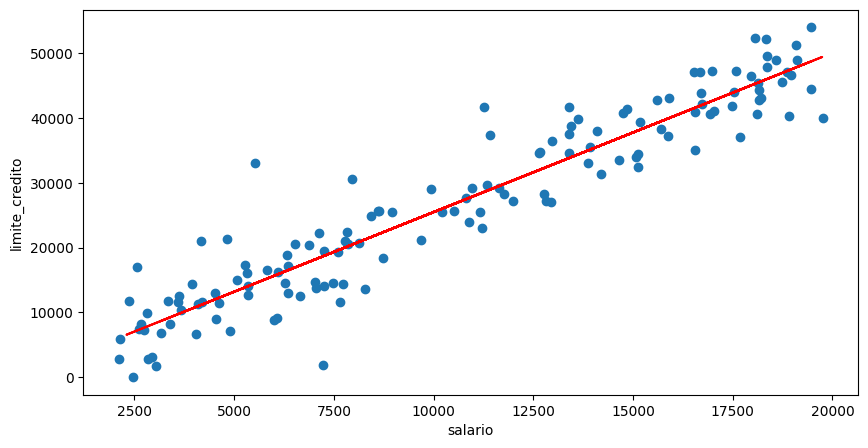

In [26]:
plt.figure(figsize=(10, 5))
plt.scatter(x_treinamento, y_treinamento)
plt.plot(x_teste, modelo.predict(x_teste), color='red')
plt.xlabel('salario')
plt.ylabel('limite_credito')

In [27]:
Previsoes = modelo.predict(x_teste)

from sklearn import metrics
print('RMS E', np.sqrt(metrics.mean_squared_error(y_teste, Previsoes)))

RMS E 5182.357802384011


In [32]:
# Fazer previsões
print(modelo.predict([[12700]]))

[[32136.31657428]]
